#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Mounting Dataset

In [2]:
from google.colab import drive                  # Mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
# change directory

import os
os.chdir("drive/MyDrive/PERI GIGI")

In [5]:
!ls

 0.jpg			        Image_79.jpg
'CAPSTONE BISMILLAH SEMANGAT'  'Screenshot 2023-05-02 103323.jpg'
'Image_1 (1).jpg'	        test
 Image_1.jpg		        train
 Image_38.jpg


#### Reading dataset

In [7]:
os.listdir("/content/drive/MyDrive/PERI GIGI")

['train',
 'test',
 'Image_1.jpg',
 'Image_79.jpg',
 'Image_1 (1).jpg',
 '0.jpg',
 'Screenshot 2023-05-02 103323.jpg',
 'Image_38.jpg',
 'CAPSTONE BISMILLAH SEMANGAT']

In [9]:
gigi_sehat_train = len(os.listdir("/content/drive/MyDrive/PERI GIGI/train/gigi sehat"))

gigi_sehat_test = len(os.listdir("/content/drive/MyDrive/PERI GIGI/test/gigi sehat"))


#================================================================================================

gigi_tak_sehat_train = len(os.listdir("/content/drive/MyDrive/PERI GIGI/train/gigi tak sehat"))

gigi_tak_sehat_test = len(os.listdir("/content/drive/MyDrive/PERI GIGI/test/gigi tak sehat"))

print(f"data train gigi sehat adalah {gigi_sehat_train}\ndata test gigi sehat adalah {gigi_sehat_test}\ndata train gigi tak sehat adalah {gigi_tak_sehat_train}\ndata test gigi tak sehat adalah {gigi_tak_sehat_test}")

data train gigi sehat adalah 720
data test gigi sehat adalah 180
data train gigi tak sehat adalah 720
data test gigi tak sehat adalah 180


Train Generator 

In [11]:
# membuat training generator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=60,
                                     zoom_range=0.3,
                                     fill_mode='nearest')

# Membuat training data generator

train_data = train_generator.flow_from_directory('/content/drive/MyDrive/PERI GIGI/train',
                                                 target_size=(150,150),
                                                 batch_size=4,
                                                 class_mode='binary')

Found 1438 images belonging to 2 classes.


In [12]:
# Membuat validation data generator

val_generator = ImageDataGenerator(rescale=1/255)

val_data = val_generator.flow_from_directory('/content/drive/MyDrive/PERI GIGI/test',
                                                 target_size=(150,150),
                                                 batch_size=4,
                                                 class_mode='binary')

Found 360 images belonging to 2 classes.


Buld The Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
model = tf.keras.models.Sequential([
    # since Conv2D is the first layer of the neural network, we should also specify the size of the input
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # apply pooling
    tf.keras.layers.MaxPooling2D(2,2),
    # and repeat the process
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the result to feed it to the dense layer
    tf.keras.layers.Flatten(), 
    # and define 512 neurons for processing the output coming by the previous layers
    tf.keras.layers.Dense(512, activation='relu'), 
    # a single output neuron. The result will be 0 if the image is 'gigi sehat' else is gigi tak sehat
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

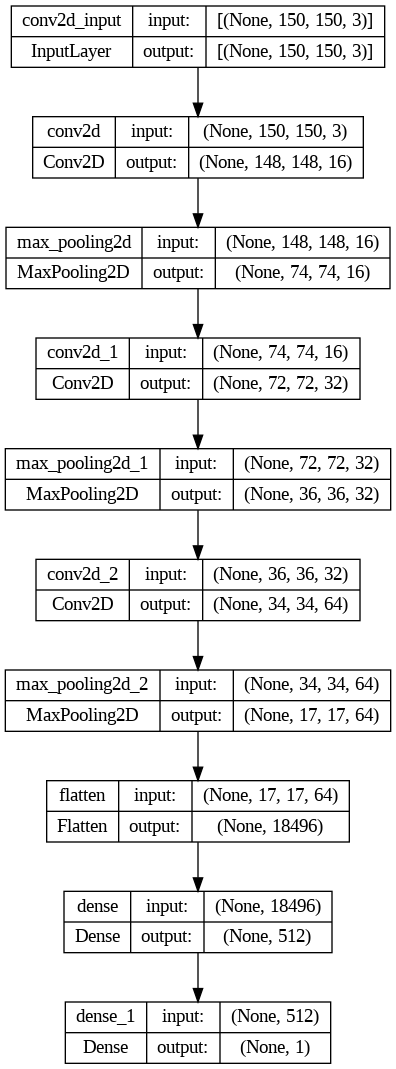

In [16]:
tf.keras.utils.plot_model(model, to_file='model.png',show_shapes=True)

Compile The Model 

In [17]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train The Model 

In [23]:
#Train Model

history = model.fit(train_data,
                    steps_per_epoch=25,
                    epochs=100,
                    validation_data= val_data,
                    validation_steps= 6,
                    verbose=2)

Epoch 1/100
25/25 - 2s - loss: 0.4642 - accuracy: 0.7551 - val_loss: 0.4584 - val_accuracy: 0.8750 - 2s/epoch - 66ms/step
Epoch 2/100
25/25 - 2s - loss: 0.3788 - accuracy: 0.8367 - val_loss: 0.1908 - val_accuracy: 1.0000 - 2s/epoch - 76ms/step
Epoch 3/100
25/25 - 2s - loss: 0.3841 - accuracy: 0.8300 - val_loss: 0.5939 - val_accuracy: 0.7500 - 2s/epoch - 78ms/step
Epoch 4/100
25/25 - 2s - loss: 0.3697 - accuracy: 0.8500 - val_loss: 0.4332 - val_accuracy: 0.8333 - 2s/epoch - 73ms/step
Epoch 5/100
25/25 - 3s - loss: 0.3860 - accuracy: 0.8100 - val_loss: 0.4330 - val_accuracy: 0.8750 - 3s/epoch - 102ms/step
Epoch 6/100
25/25 - 2s - loss: 0.3106 - accuracy: 0.8878 - val_loss: 0.4629 - val_accuracy: 0.7917 - 2s/epoch - 71ms/step
Epoch 7/100
25/25 - 2s - loss: 0.3637 - accuracy: 0.8300 - val_loss: 0.2725 - val_accuracy: 0.9167 - 2s/epoch - 63ms/step
Epoch 8/100
25/25 - 2s - loss: 0.3823 - accuracy: 0.8700 - val_loss: 0.3166 - val_accuracy: 0.8750 - 2s/epoch - 69ms/step
Epoch 9/100
25/25 - 2s 

Evaluate The Model 

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from google.colab import files

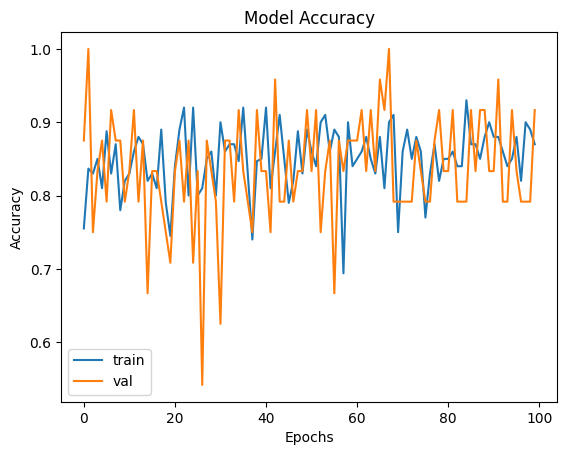

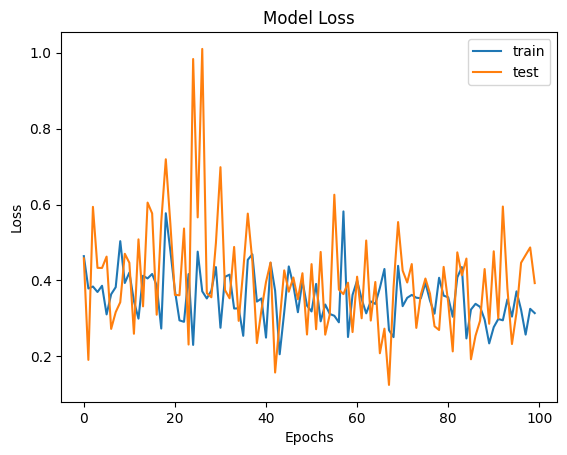

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

# 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [32]:
import time

start_time = time.time()

# Your code goes here

end_time = time.time()

execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")


Execution time: 4.839897155761719e-05 seconds


Saving 1491245618-1488225767-tooth-decay.jpg to 1491245618-1488225767-tooth-decay.jpg
1/1 [==============================] - 0s 23ms/step
1491245618-1488225767-tooth-decay.jpg
gigi tak sehat


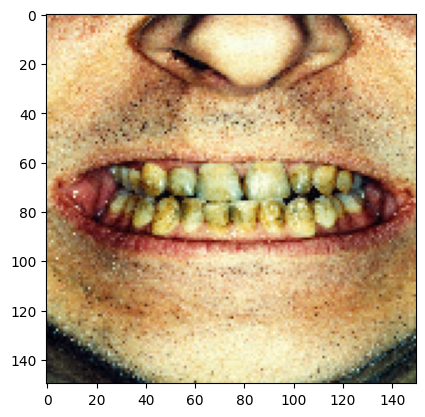

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from google.colab import files

%matplotlib inline


uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('gigi sehat')
  else:
   print('gigi tak sehat')

In [28]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('model2', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model

model.save_weights('model2.h5')